# **Exploratory Data Analysis by Visualization**

Maintainer: Zhaohu(Jonathan) Fan  contact him (psujohnny@gmail.com)

Note: This lab note is still WIP, let us know if you encounter bugs or issues.


#### *Colab Notebook [Open in Colab](https://colab.research.google.com/drive/1u9kDKOVuD819x5xdILcqOPnA5V9mtsn8?usp=sharing)*
#### *Useful information about [(Exploratory Data Analysis by Visualization)](https://yanyudm.github.io/Data-Mining-R/lecture/2.B_EDA_Vis.html)*








Let’s first load the **Iris** dataset. This is a very famous dataset in almost all data mining, machine learning courses, and it has been a Python build-in dataset. The dataset consists of 50 samples from each of three species of Iris flowers (Iris setosa, Iris virginicaand Iris versicolor). Four features(variables) were measured from each sample, they are the **length** and the **width** of sepal and petal, in centimeters. It is introduced by Sir Ronald Fisher in 1936.

*  3 Species

<a >
    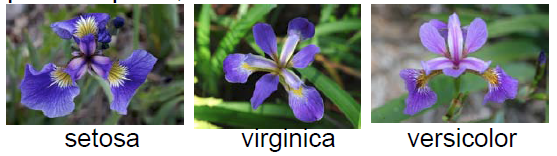
</a>


* Four features of flower: **length** and the **width** of sepal and petal

<a >
    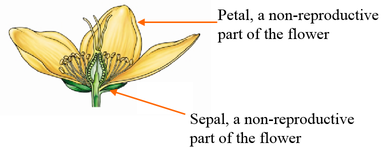
</a>

The *iris* flower data set is included in Python. It is a data frame with 150 cases (rows) and 5 variables (columns) named Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, and Species.





# 1 Exploratory Data Analysis
## 1.1 Basic summary Statistics

     
### 1.1.1 Load and prepare the Iris dataset
Before start, always do, you should

* create a new Python script (unless you are continuing last project)
* Save the Python script.

**a. Size**

For Python use .shape

In [ ]:
#Python - size
import seaborn as sns
import sklearn as sklearn
import pandas as pd
from sklearn import datasets
data = datasets.load_iris()
# Convert to Pandas dataframe
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target
iris.replace({'species': {0: 'setosa', 1: 'versicolor', 2 : 'virginica'}}, inplace = True)
iris.shape


(150, 5)

**b.Histogram**

Histogram for Sepal Length

For Python use .hist

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

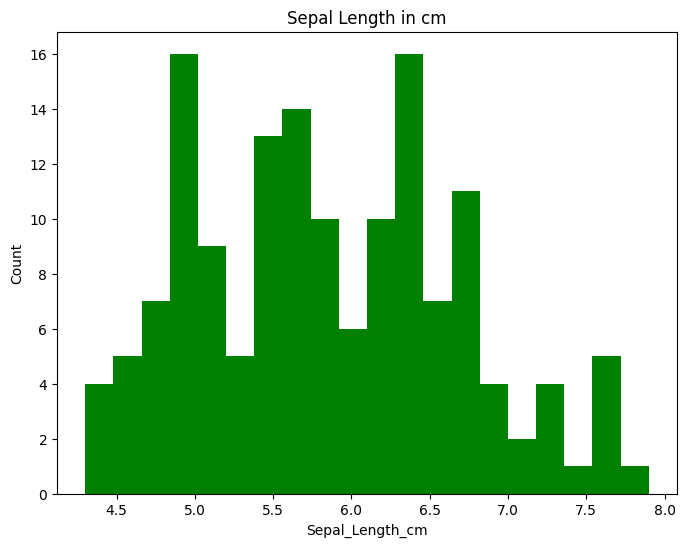

In [ ]:
plt.figure(figsize = (8,6))
x = iris['sepal length (cm)']
plt.hist(x, bins = 20, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")


**c.Box plot for Iris Data**

For Python use .boxplot

<Axes: >

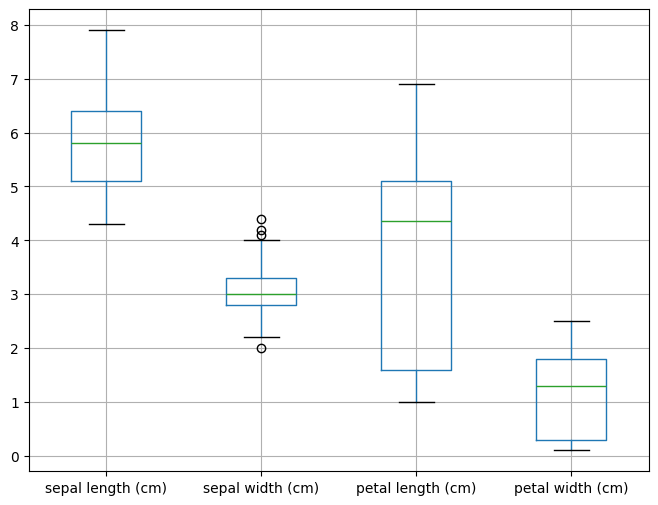

In [ ]:
plt.figure(figsize = (8,6))
iris.boxplot()

**d.Correlations for Iris Data**


<Axes: >

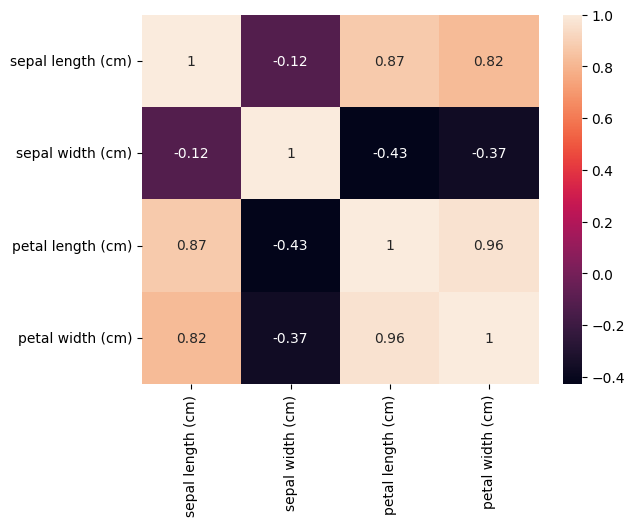

In [ ]:
# Drop the 'species' column
iris_numeric = iris.drop(columns=['species'])

# Calculate the correlation matrix using only the numeric columns
correlation_matrix = iris_numeric.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

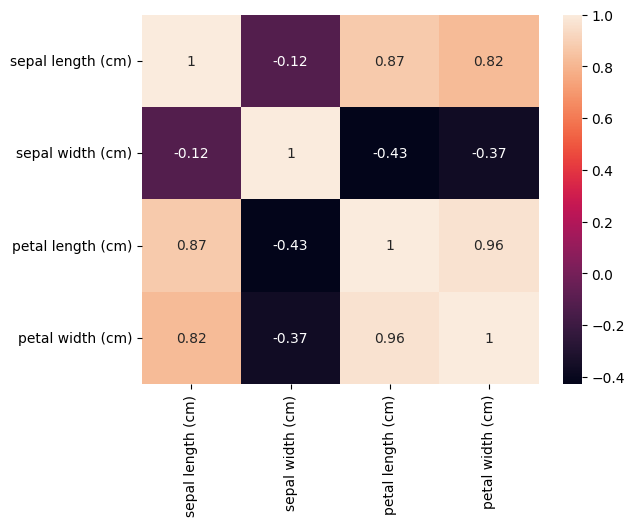

In [ ]:
# Calculate the correlation matrix using only numeric columns
correlation_matrix = iris.select_dtypes(include='number').corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True)

**e. Density plot for Iris Data**

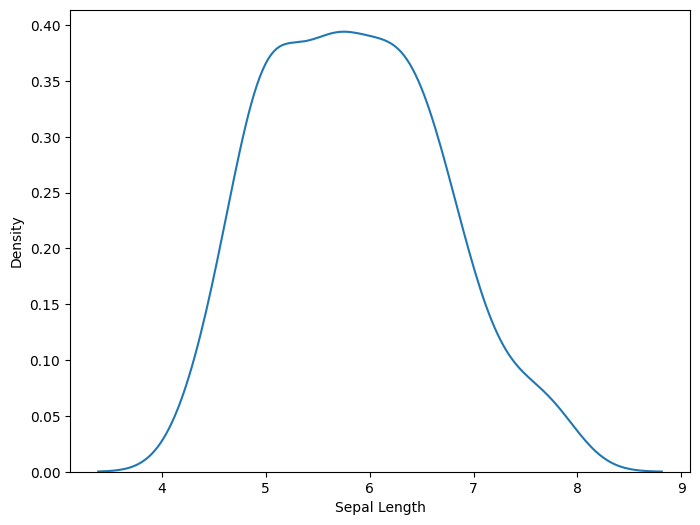

In [ ]:
plt.figure(figsize = (8,6))
sns.kdeplot(iris['sepal length (cm)'])
# Alternate - iris['sepal length (cm)'].plot(kind = 'density')
plt.xlabel('Sepal Length')
plt.show()

Combine the histogram and the density chart.

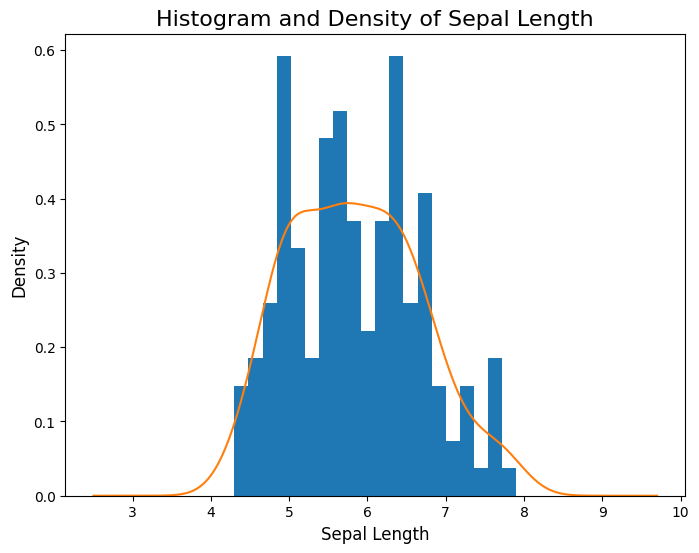

In [ ]:
plt.figure(figsize = (8,6))
plt.hist(iris['sepal length (cm)'], bins = 20, density = True)
iris['sepal length (cm)'].plot(kind = 'density')
plt.title('Histogram and Density of Sepal Length', fontsize=16)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

**f. Bar chart for Iris Data**

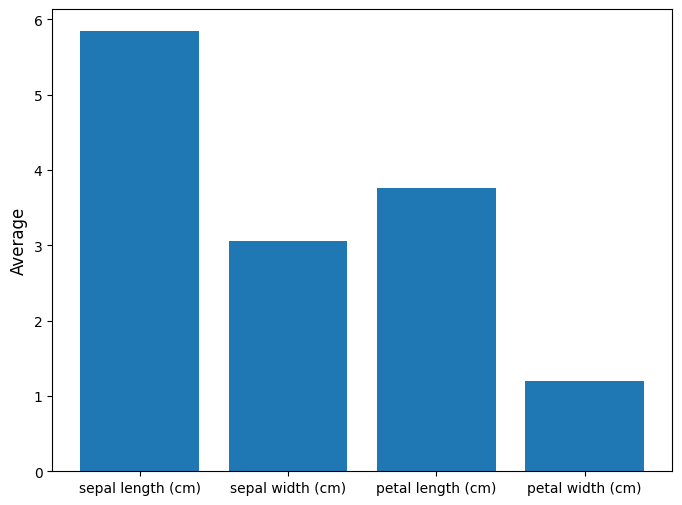

In [ ]:
plt.figure(figsize = (8,6))
aveg = iris.iloc[:,0:4].mean()
plt.bar(aveg.index, aveg.values, color = '#1f77b4')
# Alternate - plt.bar(aveg.index, aveg.values)
plt.ylabel('Average', fontsize=12)
plt.show()

In [ ]:
pd.pivot_table(iris, index=['species'], aggfunc='count')

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


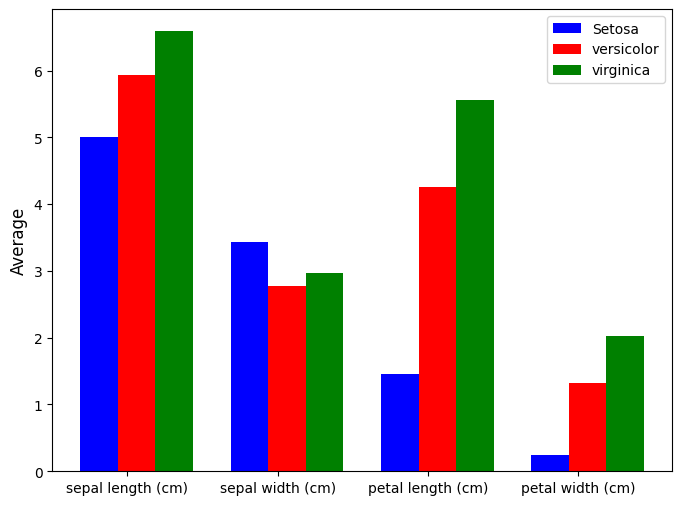

In [ ]:
aveg_group = iris.groupby('species').mean()
width = 0.25
plt.figure(figsize = (8,6))
ind = np.arange(4)
plt.bar(ind, aveg_group.iloc[0].values, width, color = 'b', label = 'Setosa')
plt.bar(ind + 0.25, aveg_group.iloc[1].values, width, color = 'r', label = 'versicolor')
plt.bar(ind + 0.5, aveg_group.iloc[2].values, width, color = 'g', label = 'virginica')
plt.xticks(ind + width*3 / 4, ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'))
plt.ylabel('Average', fontsize=12)
plt.legend(loc='best')
plt.show()


**g. Pie chart for Iris Data**

Pie chart is commonly used to visualize the proportion of different subject. It is similar to bar chart. You have to use a vector of single data points to produce a pie chart.

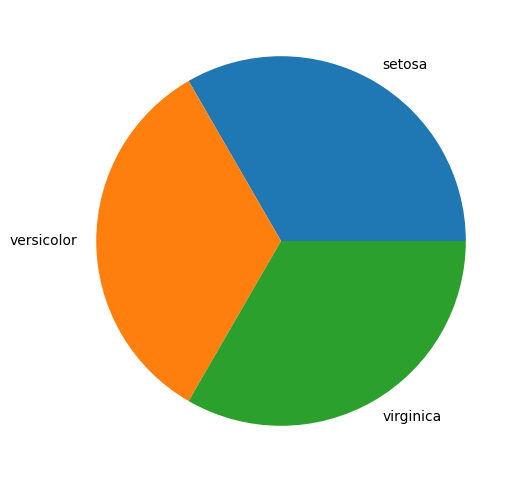

In [ ]:
count_values = pd.pivot_table(iris, index=['species'], aggfunc='count')
plt.figure(figsize = (8,6))
plt.pie(count_values.iloc[:,0], labels = count_values.index)
plt.show()

**h. Scatter plot for Iris Data**

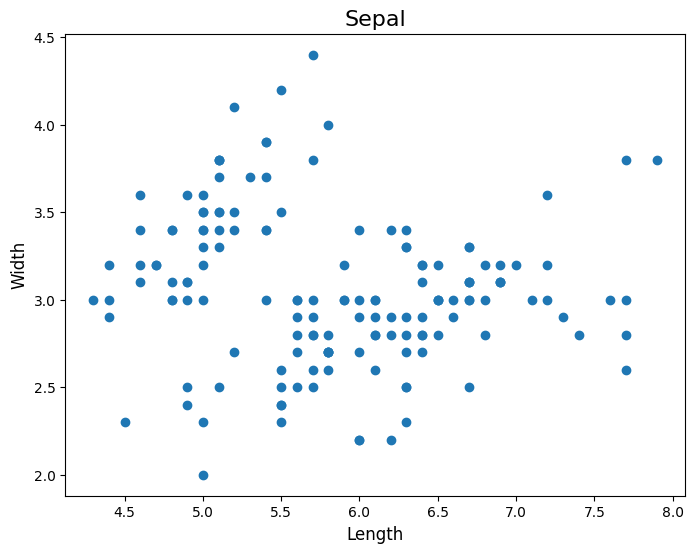

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'])
# Alternate - plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'])
plt.title('Sepal', fontsize = 16)
plt.xlabel('Length', fontsize = 12)
plt.ylabel('Width', fontsize = 12)
plt.show()

**i. Scatter plot matrix (all paired variables)**

<Figure size 1200x1200 with 0 Axes>

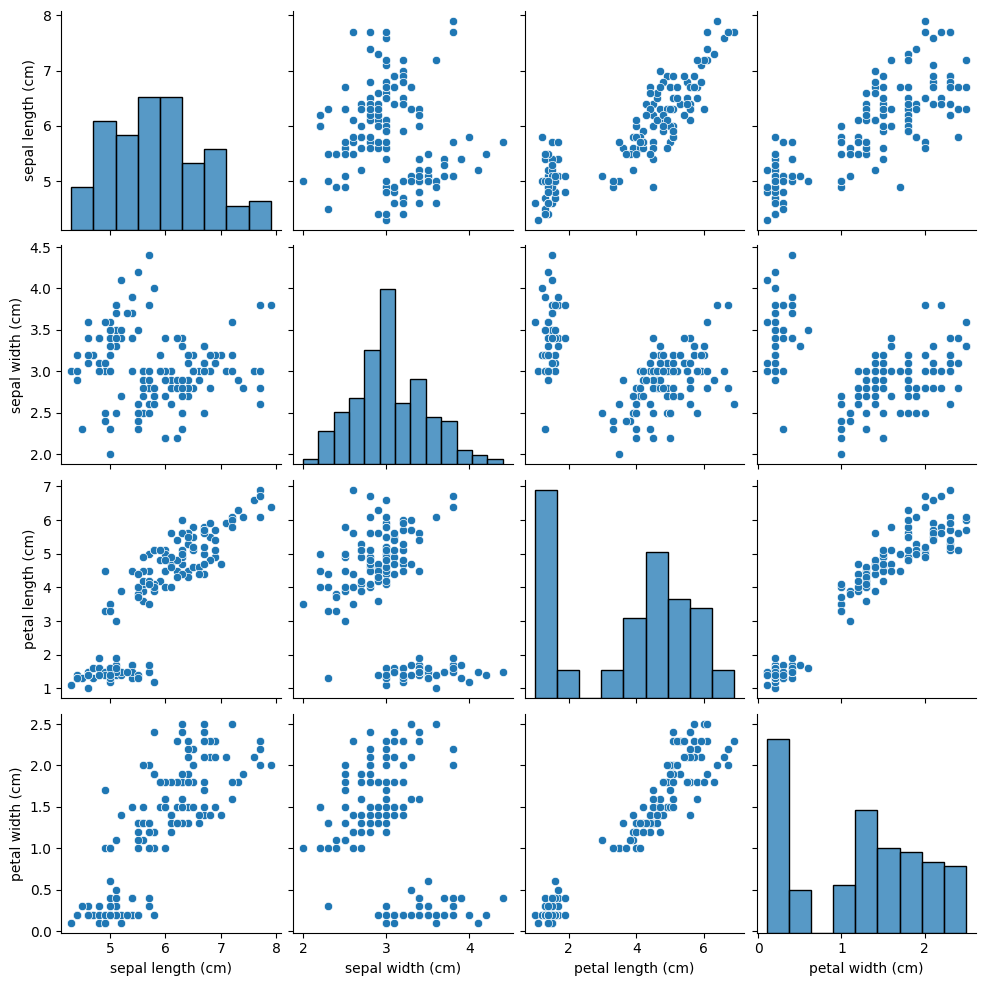

In [ ]:
plt.figure(figsize = (12,12))
sns.pairplot(iris)
plt.show()

You may display multiple plots in one window (one figure).

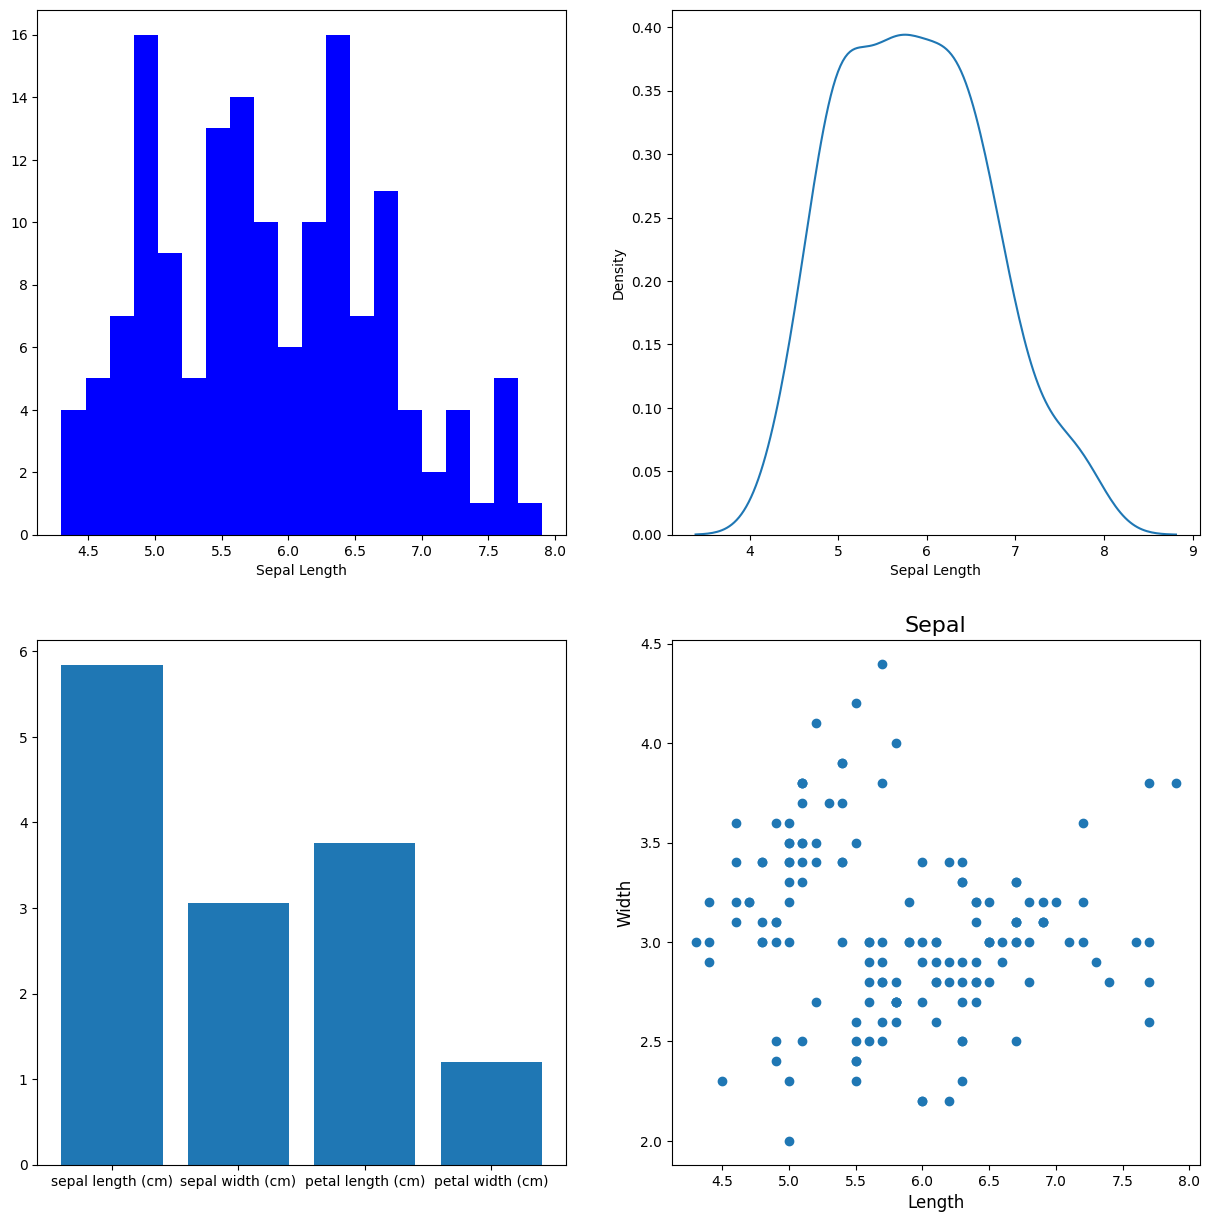

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.hist(iris['sepal length (cm)'], bins = 20, color = "blue")
plt.xlabel('Sepal Length')

plt.subplot(2,2,2)
sns.kdeplot(iris['sepal length (cm)'])
plt.xlabel('Sepal Length')

plt.subplot(2,2,3)
plt.bar(aveg.index, aveg.values, color = '#1f77b4')

plt.subplot(2,2,4)
plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'])
plt.title('Sepal', fontsize = 16)
plt.xlabel('Length', fontsize = 12)
plt.ylabel('Width', fontsize = 12)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html ///content/2_B_Exploratory_Data_Analysis_by_Visualization.ipynb

[NbConvertApp] Converting notebook ///content/2_B_Exploratory_Data_Analysis_by_Visualization.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 1171757 bytes to /content/2_B_Exploratory_Data_Analysis_by_Visualization.html
